### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [99]:
#1-
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns

gamma_dist = gamma(a=1)
x = gamma_dist.rvs(size=1000)
x

array([1.63354864e+00, 1.98906596e+00, 4.68283003e-01, 3.76041136e+00,
       2.94164449e-02, 8.45128092e-02, 1.38104026e+00, 3.68543158e-01,
       6.56266272e-01, 5.79077363e-02, 1.27896986e-01, 1.35827016e+00,
       1.48598211e+00, 5.45244928e-01, 1.08539625e+00, 5.30650133e-01,
       1.57103063e+00, 2.80022851e-01, 2.31066786e-02, 7.90933328e-02,
       1.16605939e+00, 2.74164215e-01, 6.90934978e-03, 1.13330588e-01,
       5.08019877e-01, 2.01300475e+00, 7.22778438e-01, 1.76876508e-01,
       3.16094879e+00, 1.01115166e-01, 1.28056248e+00, 2.60441443e-01,
       7.10926222e-01, 1.03185977e-01, 1.05291379e-01, 3.60258507e-01,
       2.05582543e-01, 1.02301968e+00, 1.23711050e-01, 5.26534334e-02,
       3.43040551e+00, 1.15832097e-01, 5.81143104e-01, 1.29862284e+00,
       1.44706321e+00, 5.23371514e-01, 6.93278888e-01, 5.01475732e-01,
       8.34729068e-01, 7.85028667e-01, 2.81077294e-01, 3.48421079e-01,
       3.26893176e-01, 2.08258445e+00, 2.63785497e-01, 2.86908905e+00,
      

<Axes: ylabel='Count'>

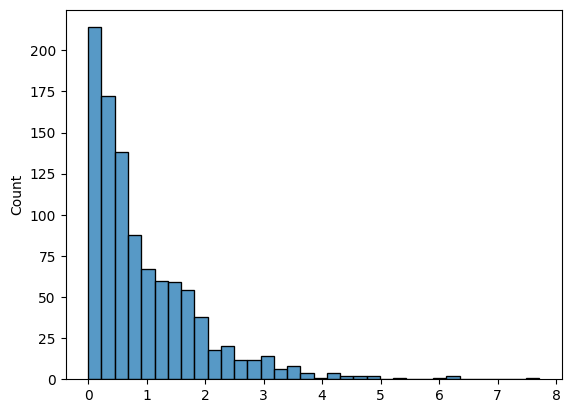

In [105]:
#2-
pdf_dist = gamma.pdf(x, 1, 1)
pdf_dist
sns.histplot(x)
#plt.plot(pdf_dist)
# plt.hist(x, bins=50, density=True, label='normalized histogram')


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

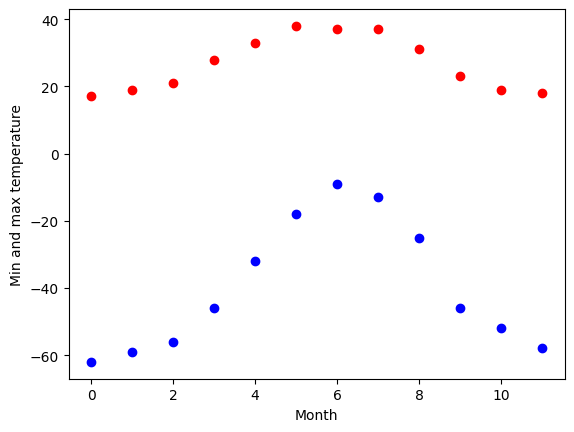

In [127]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt

months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


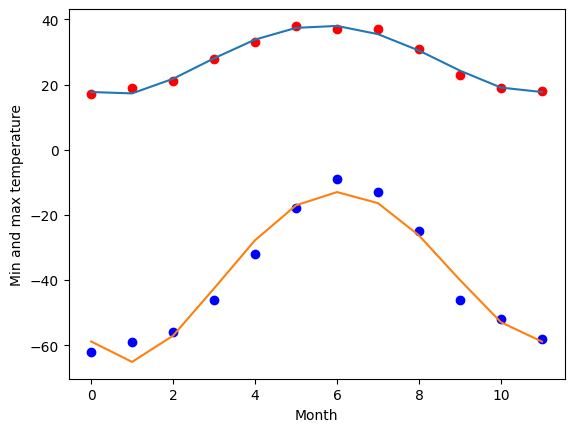

In [140]:
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

coeff_1 = np.polyfit(months, temp_max, deg=4)
coeff_1
temp_max_pred = np.polyval(coeff_1, months)
temp_max_pred
coeff_2 = np.polyfit(months, temp_min, deg=4)
temp_min_pred = np.polyval(coeff_2, months)

plt.plot(months, temp_max_pred)
plt.plot(months, temp_min_pred)


In [152]:
MAE_1 = (np.sum(np.abs(temp_max - temp_max_pred))) / len(temp_max)
MAE_1.item()
print("il MAE per le temperature massimi è : ", MAE_1)
MAE_2 = (np.sum(np.abs(temp_min - temp_min_pred))) / len(temp_min)
MAE_2
print("il MAE per le temperature minimi è : ", MAE_2)

il MAE per le temperature massimi è :  0.781177156177157
il MAE per le temperature minimi è :  2.956973581973653


In [160]:
RMSE_1 = np.sqrt((np.sum((temp_max - temp_max_pred)**2)) / len(temp_max))
RMSE_1.item()
print("il RMSE per le temperature massimi è : ", RMSE_1)
RMSE_2 = np.sqrt((np.sum((temp_min - temp_min_pred)**2)) / len(temp_min))
RMSE_2.item()
print("il RMSE per le temperature massimi è : ", RMSE_2)

il RMSE per le temperature massimi è :  0.9301038867208549
il RMSE per le temperature massimi è :  3.4879124903778185


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [176]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df




,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [184]:
df.describe()
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


il nostro modello ha per equazione: mpg = 29.6 + -0.041 * disp


<Axes: xlabel='disp', ylabel='mpg'>

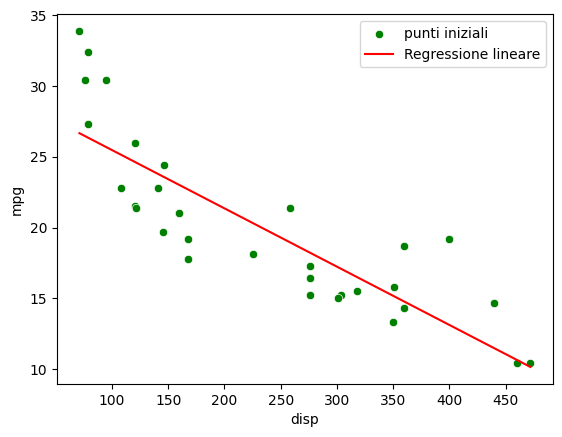

In [271]:
import seaborn as sns
x = df["disp"]
y = df["mpg"]
sns.scatterplot(x=x, y=y, color= 'green', label = "punti iniziali")
# plt.scatter(x=x, y=y)
coef = np.polyfit(x,y,deg=1)
inter = coef[0]
pente = coef[1]
print("il nostro modello ha per equazione: mpg = {} + {} * disp".format(round(pente,3), round(inter,3)))
y_pred = np.polyval(coef,x)
y_pred 
# plt.plot(x, y_pred, color = 'red')
sns.lineplot(x=x, y=y_pred, color='red', label="Regressione lineare")

In [247]:
from scipy.stats import linregress
mod = linregress(x,y)
print(f"Pendenza       : {mod.slope:.3f}")
print(f"Intercept    : {mod.intercept:.3f}")
print(f"R²          : {mod.rvalue**2 :.3f}")
print(f"P-value     : {mod.pvalue:}")
print(f"Erreur std. : {mod.stderr:.3f}")
print("\n")
print("Con il nostro R^2 = {} e P-value = {}, ppossiamo concludere che il modello spiega abbastanza bene i nostri dati\n".format(round(mod.rvalue**2,3),mod.pvalue))
print("Possiamo concludere che esiste una forte relazione lineare negativa tra 'mpg' e 'disp': ad ogni aumento di 'mpg', 'disp' tende a diminuire leggermente.")

Pendenza       : -0.041
Intercept    : 29.600
R²          : 0.718
P-value     : 9.380326537381567e-10
Erreur std. : 0.005


Con il nostro R^2 = 0.718 e P-value = 9.380326537381567e-10, ppossiamo concludere che il modello spiega abbastanza bene i nostri dati

Possiamo concludere che esiste una forte relazione lineare negativa tra 'mpg' e 'disp': ad ogni aumento di 'mpg', 'disp' tende a diminuire leggermente.
